In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load original and optimized datasets
orig_df = pd.read_csv("sweetspot_orig.csv")
opt_df = pd.read_csv("sweetspot_optimized.csv")

# Convert all applicable columns to numeric
def convert_to_numeric(df):
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

opt_df = convert_to_numeric(opt_df)


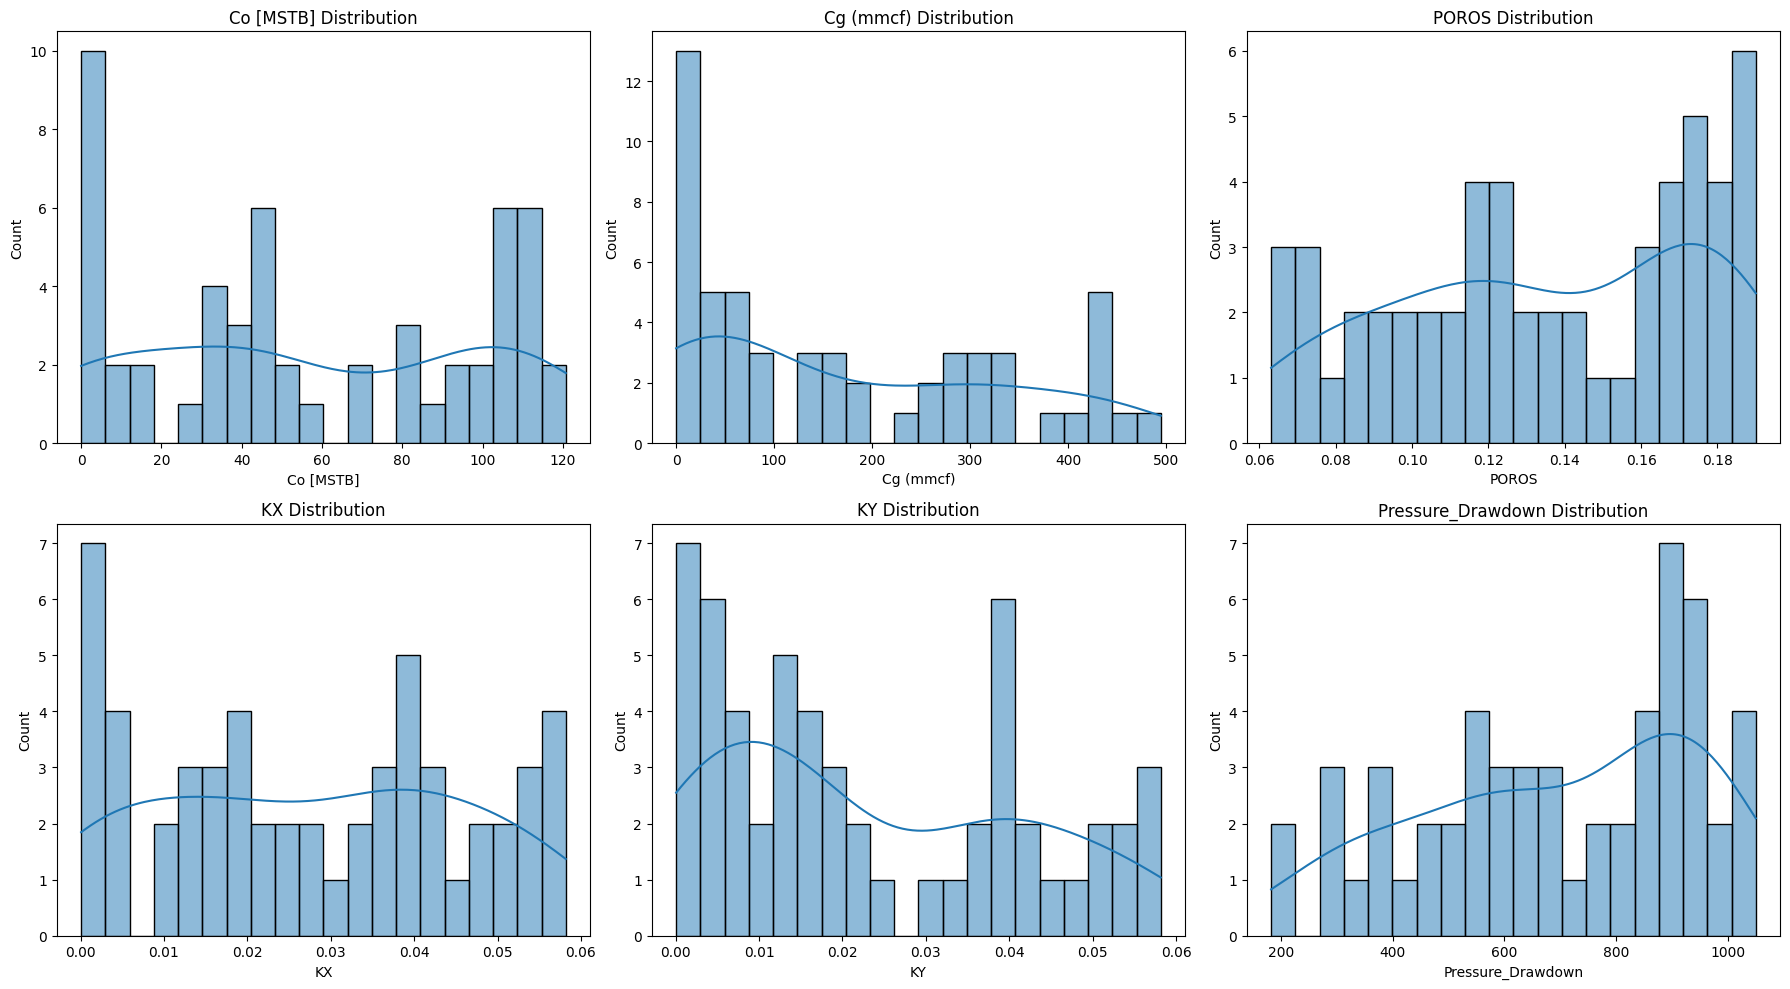

In [8]:
# Compare Distributions of Key Features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
features = ['Co [MSTB]', 'Cg (mmcf)', 'POROS', 'KX', 'KY', 'Pressure_Drawdown']

for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    sns.histplot(opt_df[feature], bins=20, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f"{feature} Distribution")

plt.tight_layout()
plt.show()

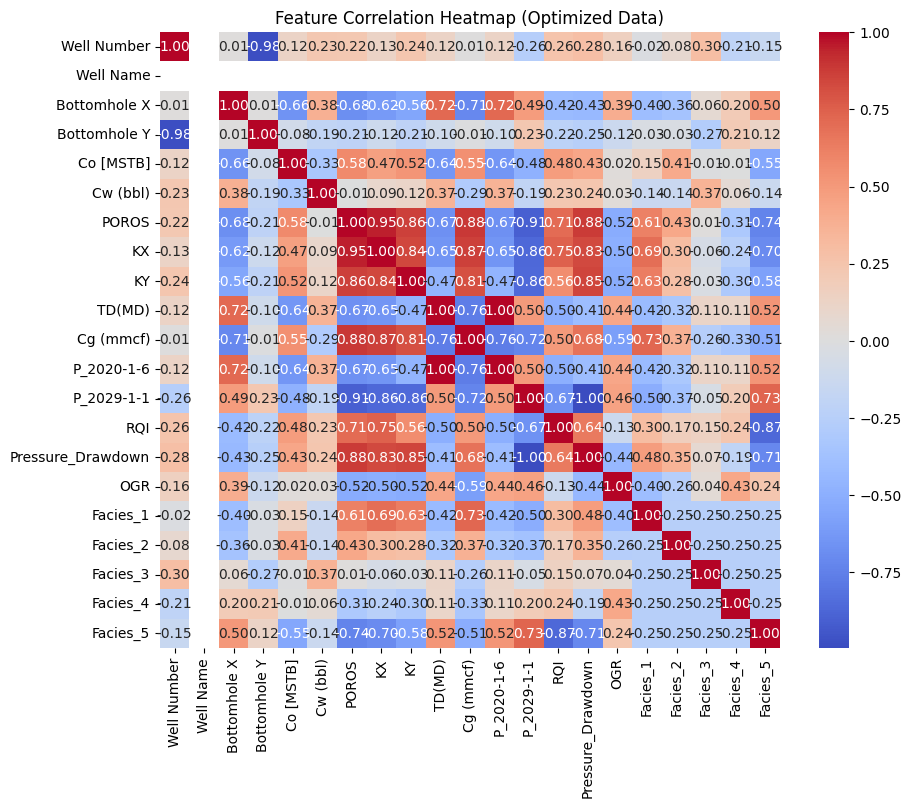

In [9]:
# Correlation Heatmap for Optimized Data
plt.figure(figsize=(10, 8))
sns.heatmap(opt_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap (Optimized Data)")
plt.show()


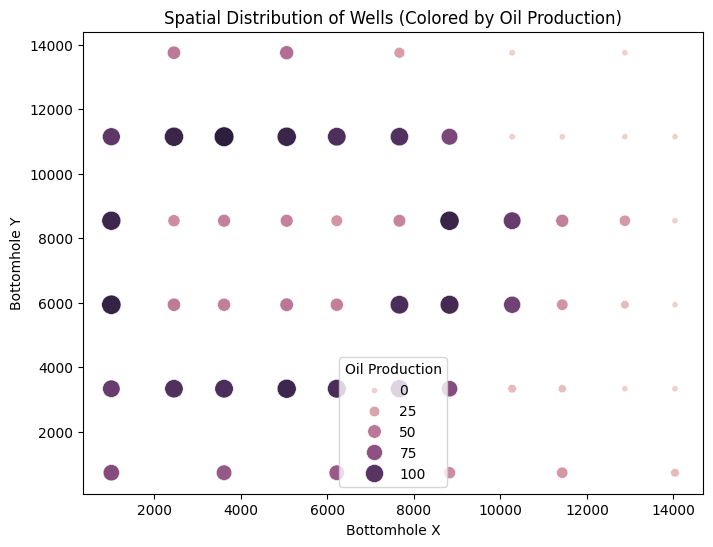

In [10]:

# Spatial Distribution of Wells
plt.figure(figsize=(8, 6))
sns.scatterplot(x=opt_df['Bottomhole X'], y=opt_df['Bottomhole Y'], hue=opt_df['Co [MSTB]'], size=opt_df['Co [MSTB]'], sizes=(20, 200))
plt.xlabel("Bottomhole X")
plt.ylabel("Bottomhole Y")
plt.title("Spatial Distribution of Wells (Colored by Oil Production)")
plt.legend(title="Oil Production")
plt.show()


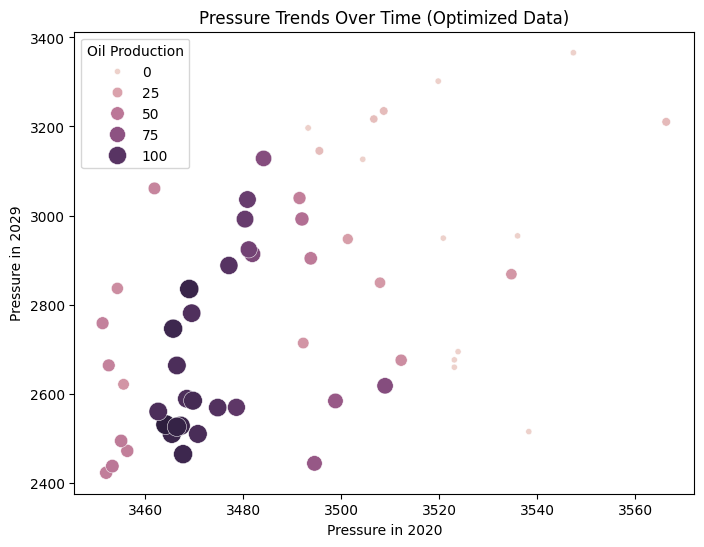

In [14]:

# Pressure Trends Over Time
plt.figure(figsize=(8, 6))
sns.scatterplot(x=opt_df['P_2020-1-6'], y=opt_df['P_2029-1-1'], hue=opt_df['Co [MSTB]'], size=opt_df['Co [MSTB]'], sizes=(20, 200))
plt.xlabel("Pressure in 2020")
plt.ylabel("Pressure in 2029")
plt.title("Pressure Trends Over Time (Optimized Data)")
plt.legend(title="Oil Production")
plt.show()
